<a href="https://colab.research.google.com/github/veronicaruiz404/SimMat/blob/main/SymPy_Funciones_escalares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de funciones escalares diferenciables con `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

- Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones.
- La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
- Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
- El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml



<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

### Algunas aplicaciones son:

1. **Ingeniería:**
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
 - Análisis conformacional - Isomería conformacional en modelado molecular
 - Desempeño en fermentación de productos.
 - Estimación de parámetros en bioquímica e ingeniería metabólica.


2. **Distribución óptima de recursos:**
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.


3. **Optimización financiera:**
 - Administración de riesgos.
 - Portafolios de inversión.
 - Problema de maximización de la utilidad.
 - la calibración de modelos de precios de opciones para datos de mercado
 - la optimización de la función de utilidad de un agente

### <p style="color:green;">En esta clase veremos aspectos básicos de optimización. Específicamente, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).</p>

<img style="float: center" src="https://matematicasies.com/local/cache-vignettes/L337xH278/extremos-77d0a.png" width="400px" height="200px" />

## Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$ y si la derivada $f'(c)$ existe en el valor $c$, entonces $f'(c) = 0$.

Sin embargo, si $f'(c)=0$ no implica la existencia de un punto crítico.

### Metodología
1. Definir el criterio de optimización.
    1. Definiendo una variable simbólica o
    2. desde el entorno `def`.
2. Derivar la función a optimizar.
3. Encontrar la raíz de la derivada.
4. Definir qué puntos son máximos o mínimos.
    1. Usando el criterio de la segunda derivada o
    2. evaluando numéricamente (método gráfico).

### Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f'(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f''(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f''(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f''(c)=0$, entonces el criterio no decide.

### Ejemplo

Sabemos que la función $f(x)=(x-2)^2$ tiene un mínimo global en $x=2$, pues

$$f(x)=(x-2)^2\geq0,\qquad\text{y}\qquad f(x)=(x-2)^2=0 \qquad\text{si y solo si}\qquad x=2.$$

In [ ]:
import sympy as sym

In [ ]:
#Paso 1
x = sym.var('x')
f = (x-2)**2
f

(x - 2)**2

In [ ]:
#Paso 2
df  = f.diff()
df

2*x - 4

In [ ]:
#Paso 3
c=sym.solve(df,x)
c

[2]

In [ ]:
#Paso 4. Criterio de la derivada
df2 = df.diff()
df2

2

In [ ]:
#Gráfica
sym.plot(f,(x,-1,5),title='f(x)=(x-2)^2')

In [ ]:
#Usando matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
f_num = sym.lambdify(x,f,'numpy')
f_num(0)

4

In [ ]:
f_num(np.array([0,2,3]))

array([4, 0, 1])

In [ ]:
#Definimos el arreglo númerico en donde queremos graficar
x_num = np.linspace(-1,5,100)

#Evaluamos la función en 'x_num'
y_num = f_num(x_num)

#Grafica
plt.plot(x_num,y_num)
plt.plot(c[0],f_num(c[0]),'ro')
plt.grid()

Otra forma de hacer l omismo (solo para criterios que no se usen funciones matematicas)

In [ ]:
#Criterio de optimización
def f(x):
  return (x-2)**2

In [ ]:
#Derivamos
df = sym.diff(f(x))
df

2*x - 4

In [ ]:
c = sym.solve(df,x)
c

[2]

In [ ]:
#Grafica
x_num = np.linspace(-1,5,100)
y_num = f(x_num)
plt.plot(x_num,y_num)
plt.plot(c[0],f(c[0]),'ro')
plt.grid()

### Actividad
Considere $g(x)=(x-2)^3$.
- Usando `sympy`, muestre que $g'(2)=0$.
- Sin embargo, descartar que $x=2$ es un extremo de $g(x)$ viendo su **gráfica**.

In [ ]:
import sympy as sym

In [ ]:
#Criterio de optimización
def g(x):
  return (x-2)**3

In [ ]:
#Derivamos
dg = sym.diff(g(x))
dg

3*(x - 2)**2

In [ ]:
dg2 = sym.diff(dg)
dg2

6*x - 12

In [ ]:
c=sym.solve(dg2,x)
c

[2]

In [ ]:
dg2.subs(x,c[0])

0

In [ ]:
x=np.linspace(1,3,100)
y=g(x)
plt.plot(x,y)
plt.plot(c[0],g(c[0]),'r*',ms=8)
plt.grid()

### Actividad

¿Qué pasa con $h(x)=(x-2)^4$ al intentar utilizar el criterio de la segunda derivada?.

In [ ]:
#Importamos las librerias
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Definamos la variable simbólica y la función
x = sym.var('x')
def h(x):
  return (x-2)**4

h(x)

(x - 2)**4

In [ ]:
dh = h(x).diff() #Derivamos el resultado que nos regresa la funcion
c = sym.solve(dh,x) #Encontramoa los puntos criticos
c

[2]

In [ ]:
ddh = dh.diff() #Derivamos la segunda vez
ddh.subs(x,c[0])

0

<function matplotlib.pyplot.grid(visible: 'bool | None' = None, which: "Literal['major', 'minor', 'both']" = 'major', axis: "Literal['both', 'x', 'y']" = 'both', **kwargs) -> 'None'>

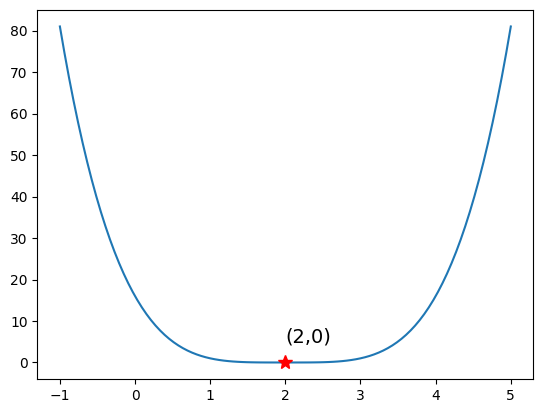

In [ ]:
#Graficamos
x_num = np.linspace(-1,5,100)
y_num = h(x_num)
plt.plot(x_num,y_num)
plt.plot(c[0],h(c[0]),'r*',ms = 10)
plt.text(c[0],h(c[0])+5,f'({c[0]},{h(c[0])})',fontsize = 14)
plt.grid

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-2x+5$ en $\left[0,3\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,3\right]$:

In [ ]:
def f(x):
  return x**2-2*x+5
f(x)

x**2 - 2*x + 5

In [ ]:
df = sym.diff(f(x))
c = sym.solve(df,x)
c

[1]

In [ ]:
puntos = np.array([0,1,3]) #Puntos a evualuar

In [ ]:
f(puntos)

array([81, 64,  0])

### Actividad
Determinar los valores extremos absolutos de  $f(x) = (x-3)^2(x+3)^2$ en el intervalo $[1,\,4]$, usando `sympy`. Mostrar en una gráfica.

In [ ]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(X):
  return (X-3)**2*(X+3)**2
f(x)

(x - 3)**2*(x + 3)**2

In [ ]:
df = sym.diff(f(x))
c = sym.solve(df,x)
c

[-3, 0, 3]

In [ ]:
puntos = np.array([1, c[2],4])
f(puntos)

array([64, 0, 49], dtype=object)

### Cambio de librerías
Uso de funciones entre librerías `NumPy` y `SymPy`

$$
f(x)=e^{-x}\cos(2x),
$$
para $x\in[-1,1]$.

In [ ]:
#Definimos'f' como una variable y no usando el entorno 'def'
x = sym.var('x')
f = sym.exp(-x)*sym.cos(2*x)
f

exp(-x)*cos(2*x)

In [ ]:
#Derivamos
df = f.diff()
df

-2*exp(-x)*sin(2*x) - exp(-x)*cos(2*x)

In [ ]:
#Encontramos los puntos críticos
c = sym.solve(df,x)
c[0],float(c[0])

(-atan(1/2)/2, -0.23182380450040305)

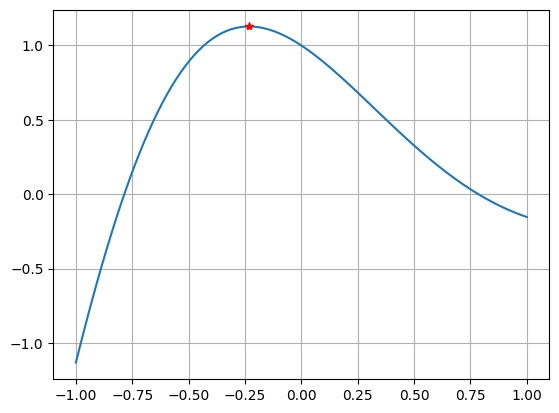

In [ ]:
#Graficamos
#Convertimos la variable simbolica 'f' a una función que acepte arreglos de NumPy
f_num = sym.lambdify(x,f,'numpy')
#
x_num = np.linspace(-1,1,100)
y_num = f_num(x_num)
plt.plot(x_num,y_num)
plt.plot(float(c[0]),f_num(float(c[0])),'r*')
plt.grid()

In [ ]:
#Usemos funciones de NumPy
def f(x):                               #esto solo nos va a servir para graficar
  return np.exp(-x)*np.cos(2*x)

### Otra función a optimizar (con puntos críticos complejos)
$$
f(x)=(x^2+1)^2(x-1)^2
$$

In [ ]:
def f(x):
  return (x**2+1)**2*(x-1)**2
f(x)

(x - 1)**2*(x**2 + 1)**2

In [ ]:
df =sym.diff(f(x),x)
c = sym.solve(df,x)
c                         #Tenemos ypuntos criticos complejos

[1, -I, I, 1/3 - sqrt(2)*I/3, 1/3 + sqrt(2)*I/3]

In [ ]:
x = sym.var('x', real=True)
df = sym.diff(f(x),x)
c=sym.solve(df,x)
c

[1]

In [ ]:
x_num = np.linspace(-1,2,100)
plt.plot(x_num,f(x_num))
plt.plot(c[0],f(c[0]),'r*')
plt.grid()

NameError: name 'np' is not defined

---
1. **Resistencia de una viga**  Una viga de madera tiene una sección transversal rectangular de altura $h$ y ancho $w$. La resistencia $S$ de la viga es directamente proporcional al ancho y al cuadrado de su altura ($S=kwh^2$, donde $k$ es una constante de proporcionalidad). ¿Cuáles son las dimensiones de la viga más fuerte que puede cortarse a partir de un leño redondo de $24$ pulgadas de diámetro?

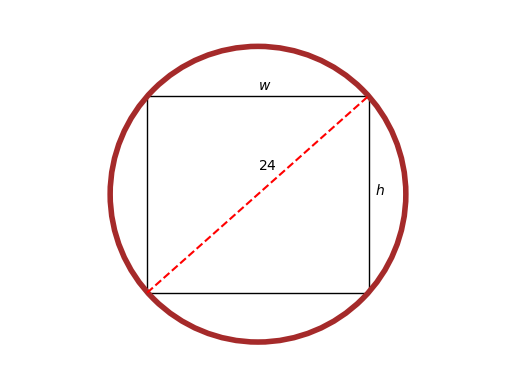

In [ ]:
#@markdown
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C = patches.Circle((0, 0),12, fill=False,color='brown',lw=4)
S = patches.Rectangle((-9,-8),18,16,fill=False,color='k')
ax = plt.gca()
ax.add_artist(S)
ax.add_artist(C)

plt.text(0,8.5,'$w$')
plt.text(9.5,0,'$h$')

plt.plot([-9,9],[-8,8],'r--')
plt.text(0,2,'$24$')

plt.axis('equal')
plt.ylim([-15,15])
plt.axis('off')
plt.show()

In [ ]:
k = 1.3e4
def S(w):
  return k*w*(24**2-w**2)
w = sym.var('w', possitive=True)
S(w)

13000.0*w*(576 - w**2)

In [ ]:
dS = sym.diff(S(w),w)
c = sym.solve(dS,w)
c

[-13.8564064605510, 13.8564064605510]

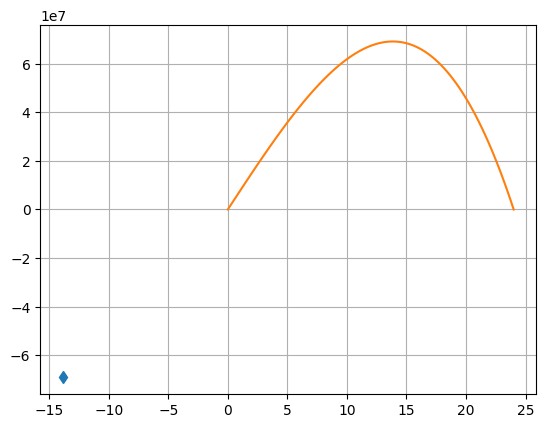

In [ ]:
plt.plot(c[0],S(c[0]),'d')
w_num=np.linspace(0,24,100)
plt.plot(w_num,S(w_num))
plt.grid()

In [ ]:
#Calculamos la altura optima
(24**2-c[0]**2)**0.5

19.5959179422654

In [ ]:
S(c[0])

-69171181.0510707

---
2. **Iluminación**  Una fuente luminosa se localiza sobre el centro de una mesa circular de $4 pies$ de diámetro. Encontrar la altura $h$ de la fuente luminosa de modo tal que la iluminación $I$ en el perímetro de la mesa sea máxima si $I=k(\sin \alpha)/s^2$, donde $s$ es la altura oblicua, $\alpha$ es el ángulo al cual la luz incide sobre la mesa y $k$ es una constante (El valor de esta última constante es irrelevante para el problema, ya que no se pide el valor de la iluminación).

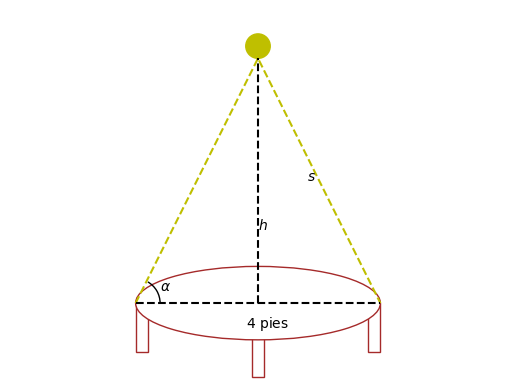

In [ ]:
#@markdown
E = patches.Ellipse((0, 0),10, 3,fc='white',ec='brown')
C = patches.Circle((0,10.5),0.5,color='y')
a = patches.Arc((-5,0),2,2,theta2=60)
p1 = patches.Rectangle((-5, -2),0.5, 2, fill=False,color='brown')
p2 = patches.Rectangle((4.5, -2),0.5, 2, fill=False,color='brown')
p3 = patches.Rectangle((-0.25, -3),0.5, 2, fill=False,color='brown')
ax = plt.gca()
ax.add_artist(p1)
ax.add_artist(p2)
ax.add_artist(p3)
ax.add_artist(E)
ax.add_artist(C)
ax.add_artist(a)

plt.text(2,5,'$s$')
plt.text(0,3,'$h$')
plt.text(-4,0.5,r'$\alpha$')
plt.text(-0.5,-1,'$4$ pies')

plt.plot([-5,0,5],[0,10,0],'y--')
plt.plot([-5,5],[0,0],'k--')
plt.plot([0,0],[0,10],'k--')


plt.axis('equal')
plt.ylim([-3.1,12])
plt.axis('off')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
r = 2.0

In [24]:
def I_of_h(h, r=r):
  sq = h**2 + r**2
  return h / (sq**1.5)

In [25]:
h_opt_analytical = r / np.sqrt(2)

In [26]:
h_vals = np.linspace(0.1, 5, 400)
I_vals = I_of_h(h_vals, r=r)

In [27]:
idx_max = np.argmax(I_vals)
h_opt_numerical = h_vals[idx_max]
I_opt = I_vals[idx_max]

In [28]:
print(f"Radio r = {r} pies")
print(f"Altura que maximiza I (analítico): h = {h_opt_analytical:.6f} pies")
print(f"Altura que maximiza I (numérico): h = {h_opt_numerical:.6f} pies")
print(f"Iluminación normalizada en ese punto: I = {I_opt:.6f} (k=1)")

Radio r = 2.0 pies
Altura que maximiza I (analítico): h = 1.414214 pies
Altura que maximiza I (numérico): h = 1.414035 pies
Iluminación normalizada en ese punto: I = 0.096225 (k=1)


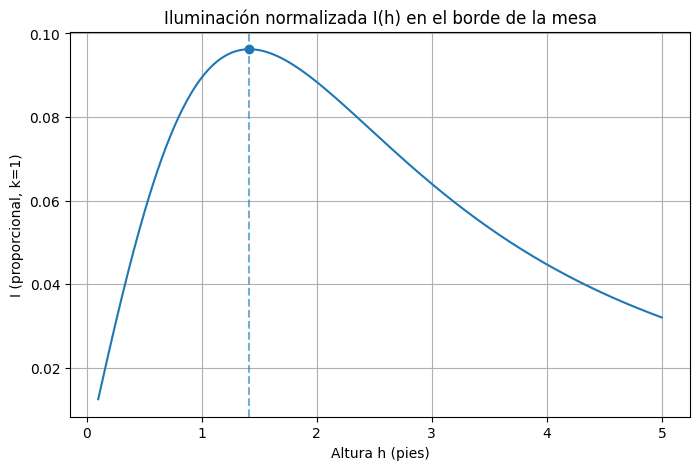

In [29]:
plt.figure(figsize=(8,5))
plt.plot(h_vals, I_vals)
plt.scatter([h_opt_analytical], [I_of_h(h_opt_analytical, r)], marker='o')
plt.axvline(h_opt_analytical, linestyle='--', alpha=0.6)
plt.title('Iluminaci\u00f3n normalizada I(h) en el borde de la mesa')
plt.xlabel('Altura h (pies)')
plt.ylabel('I (proporcional, k=1)')
plt.grid(True)
plt.show()

In [30]:
print('\nResultado final:')
print(f"La altura h que maximiza la iluminaci\u00f3n en el perímetro es h = {h_opt_analytical:.6f} pies \u2248 {h_opt_analytical:.4f} pies (\u221a2 ≈ {np.sqrt(2):.6f}).")


Resultado final:
La altura h que maximiza la iluminación en el perímetro es h = 1.414214 pies ≈ 1.4142 pies (√2 ≈ 1.414214).


3. **Fuerza mínima**  Se diseña un componente para deslizar un bloque de acero con peso $W=10 N$ a través de una mesa y sobre una canaleta. Se opone al movimiento del bloque una fuerza de fricción proporcional a su peso aparente (sea $k=0.1$ la constante de proporcionalidad). Determinar la fuerza mínima $f$ necesaria para deslizar el bloque y encontrar el valor correspondiente de $\theta$.

Ayudín: $f\cos \theta$ es la fuerza de dirección del movimiento, y $f\sin\theta$ es la fuerza que tiende a levantar el bloque. De tal modo, el peso aparente del bloque es $W-f\sin\theta$.

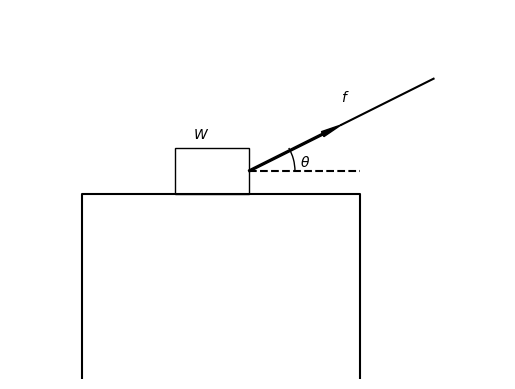

In [ ]:
#@markdown
W = patches.Rectangle((0, 2),0.8, 0.5, fill=False,color='k')
a = patches.Arrow(0.8,2.25,1,0.5,width=0.1,color='k')
arc = patches.Arc((0.8,2.25),1,1,theta2=30)
ax = plt.gca()
ax.add_artist(W)
ax.add_artist(a)
ax.add_artist(arc)

plt.text(0.2,2.6,'$W$')
plt.text(1.8,3,'$f$')
plt.text(1.35,2.305,r'$\theta$')

plt.plot([1.8,2.8],[2.75,3.25],'k')
plt.plot([0.8,2],[2.25,2.25],'k--')
plt.plot([-1,-1,2,2],[0,2,2,0],'k')


plt.axis('equal')
plt.ylim([0,4])
plt.axis('off')
plt.show()

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
W = 10.0
k = 0.1

In [34]:
def f_theta(theta):
  return k*W / (np.cos(theta) + k*np.sin(theta))

In [35]:
theta_vals = np.linspace(0, np.deg2rad(89), 1000)
f_vals = f_theta(theta_vals)

In [38]:
idx_min = np.argmin(f_vals)
theta_min = theta_vals[idx_min]
f_min = f_vals[idx_min]

print(f"\nFuerza mínima numérica: f_min = {f_min:.6f} N")
print(f"Ángulo que la minimiza: θ = {np.rad2deg(theta_min):.6f} grados")


Fuerza mínima numérica: f_min = 0.995037 N
Ángulo que la minimiza: θ = 5.701702 grados


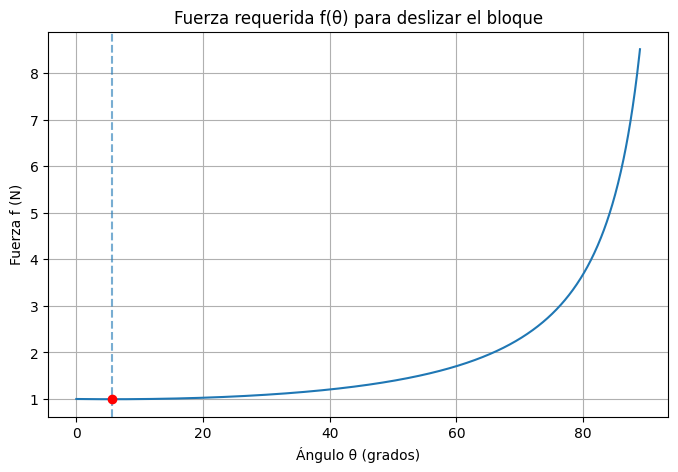

In [39]:
plt.figure(figsize=(8,5))
plt.plot(np.rad2deg(theta_vals), f_vals)
plt.scatter(np.rad2deg(theta_min), f_min, color='red', zorder=5)
plt.axvline(np.rad2deg(theta_min), linestyle='--', alpha=0.6)
plt.title('Fuerza requerida f(θ) para deslizar el bloque')
plt.xlabel('Ángulo θ (grados)')
plt.ylabel('Fuerza f (N)')
plt.grid(True)
plt.show()

In [40]:
print("\nResultado final:")
print(f"La fuerza mínima es f = {f_min:.6f} N y ocurre en θ ≈ {np.rad2deg(theta_min):.6f}°.")


Resultado final:
La fuerza mínima es f = 0.995037 N y ocurre en θ ≈ 5.701702°.


**Volumen de una caja**  Para elavorar una caja, una fábrica dispone de láminas de cartón cuadradas de 13 unidades por lado, a las cuales se les recorta un cuadrado en cada extremo. ¿Qué longitud debe tener el del cuadrado del recorte para que la caja costruida contenga el máximo volumen posible?

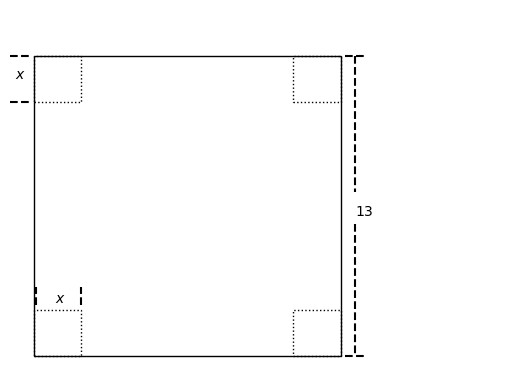

In [ ]:
#@markdown
import matplotlib.pyplot as plt
from matplotlib import patches
S1 = patches.Rectangle((0, 0),13,13, fill=False,color='k')
c1 = patches.Rectangle((11,0),2,2,fill=False,color='k',ls=':')
c2 = patches.Rectangle((0,0),2,2,fill=False,color='k',ls=':')
c3 = patches.Rectangle((11,11),2,2,fill=False,color='k',ls=':')
c4 = patches.Rectangle((0,11),2,2,fill=False,color='k',ls=':')
ax = plt.gca()
ax.add_artist(S1)
ax.add_artist(c1)
ax.add_artist(c2)
ax.add_artist(c3)
ax.add_artist(c4)

plt.text(-0.8,12,'$x$')
plt.plot([-1,-0.2],[11,11],'k--')
plt.plot([-1,-0.2],[13,13],'k--')
plt.text(0.9,2.3,'$x$')
plt.plot([0.1,0.1],[2.2,3],'k--')
plt.plot([2,2],[2.2,3],'k--')

plt.plot([13.2,14],[0,0],'k--')
plt.plot([13.2,14],[13,13],'k--')
plt.plot([13.6,13.6],[13,7.1],'k--')
plt.text(13.6,6.1,'$13$')
plt.plot([13.6,13.6],[5.7,0],'k--')

plt.axis([-1,20,-1,15])
#plt.axis('equal')
plt.axis('off')
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [42]:
L = 13.0

In [43]:
def V(x):
  return x * (L - 2*x)**2

In [44]:
x_analytical = L / 6.0

In [45]:
x_vals = np.linspace(1e-6, L/2 - 1e-6, 10000)
V_vals = V(x_vals)
idx_max = np.argmax(V_vals)
x_numerical = x_vals[idx_max]
V_max = V_vals[idx_max]

In [46]:
print(f"Solución analítica: x = L/6 = {x_analytical:.6f} unidades")
print(f"Solución numérica: x = {x_numerical:.6f} unidades")
print(f"Volumen máximo: V = {V_max:.6f} unidades^3")

Solución analítica: x = L/6 = 2.166667 unidades
Solución numérica: x = 2.166667 unidades
Volumen máximo: V = 162.740741 unidades^3


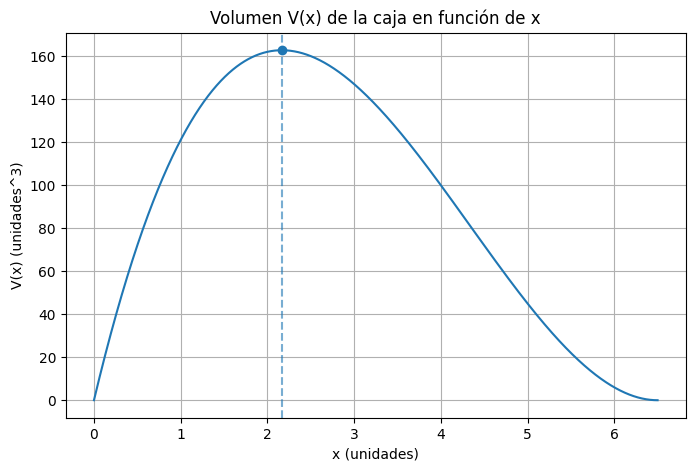

In [47]:
plt.figure(figsize=(8,5))
plt.plot(x_vals, V_vals)
plt.scatter([x_analytical], [V(x_analytical)], zorder=5)
plt.axvline(x_analytical, linestyle='--', alpha=0.6)
plt.title('Volumen V(x) de la caja en funci\u00f3n de x')
plt.xlabel('x (unidades)')
plt.ylabel('V(x) (unidades^3)')
plt.grid(True)
plt.show()

In [48]:
print('\nResultado final:')
print(f"La longitud del cuadrado de recorte que maximiza el volumen es x = {x_analytical:.6f} ≈ {x_analytical:.4f} unidades.")
print(f"El volumen máximo resultante es V = {V_max:.6f} unidades^3.")


Resultado final:
La longitud del cuadrado de recorte que maximiza el volumen es x = 2.166667 ≈ 2.1667 unidades.
El volumen máximo resultante es V = 162.740741 unidades^3.


---
**Minimización del tiempo.** Un barco encalló en el punto **P** a $9 km$ del punto más próximo a la costa en línea recta. Se necesita enviar a un mensajero a un pueblo situado en la orilla de la costa a 15 km de **P**. Teniendo en cuenta que el mensajero recorre a pie $5 km/h$, y en una barca a $4 km/h$, decir en qué punto de la orilla debe desembarcar para llegar al pueblo lo más pronto posible?

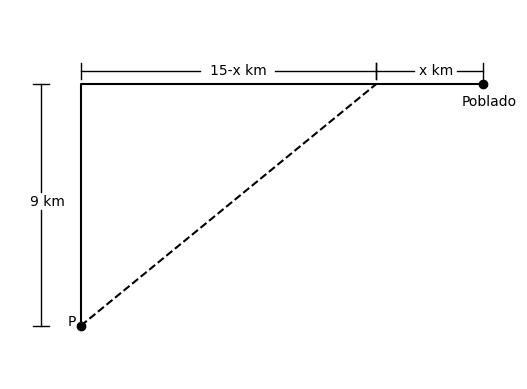

In [ ]:
#@markdown
import matplotlib.pyplot as plt
def dim(p1,p2,txt):
    vertical=p1[0]-p2[0]==0
    plt.plot([p1[0]-0.3*vertical,p1[0]+0.3*vertical],[p1[1]-0.3*(1-vertical),p1[1]+0.3*(1-vertical)],'k',
             [p2[0]-0.3*vertical,p2[0]+0.3*vertical],[p2[1]-0.3*(1-vertical),p2[1]+0.3*(1-vertical)],'k',
             [min(p1[0],p2[0]),(p1[0]+p2[0])/2-0.15*len(txt)*(1-vertical)],[min(p1[1],p2[1]),(p1[1]+p2[1])/2-0.2*vertical],'k',
             [max(p1[0],p2[0]),(p1[0]+p2[0])/2+0.25*len(txt)*(1-vertical)],[max(p1[1],p2[1]),(p1[1]+p2[1])/2+0.5*vertical],'k',lw=1)
    plt.text((p1[0]+p2[0])/2-len(txt)*0.1,(p1[1]+p2[1])/2-0.15*(1-vertical),txt)

plt.plot([0,0,15],[0,9,9],'k',
         [0,11],[0,9],'--k',
         [0,15],[0,9],'ok')
plt.text(-0.5,0,'P')
plt.text(14.2,8.2,'Poblado')
dim((-1.5,9),(-1.5,0),'9 km')
dim((0,9.5),(11,9.5),'15-x km')
dim((11,9.5),(15,9.5),'x km')

plt.axis('equal')
ax=plt.axis('off')

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [50]:
distancia_costa = 9
distancia_poblado = 15
velocidad_barca = 4
velocidad_pie = 5

In [51]:
def tiempo_total(x):
   distancia_barca = np.sqrt(distancia_costa**2 + x**2)
   distancia_pie = np.abs(distancia_poblado - x)
   return distancia_barca/velocidad_barca + distancia_pie/velocidad_pie

In [52]:
resultado = minimize_scalar(tiempo_total, bounds=(0, distancia_poblado), method='bounded')
x_optimo = resultado.x
tiempo_minimo = resultado.fun

In [53]:
print("="*60)
print("OPTIMIZACIÓN DEL TIEMPO DE VIAJE DEL MENSAJERO")
print("="*60)
print(f"Distancia del barco a la costa: {distancia_costa} km")
print(f"Distancia al poblado: {distancia_poblado} km")
print(f"Velocidad en barca: {velocidad_barca} km/h")
print(f"Velocidad a pie: {velocidad_pie} km/h")
print("\nRESULTADOS:")
print(f"Punto óptimo de desembarco: {x_optimo:.4f} km del punto más cercano")
print(f"Tiempo mínimo de viaje: {tiempo_minimo:.4f} horas")
print(f"Distancia a pie restante: {np.abs(distancia_poblado - x_optimo):.4f} km")


OPTIMIZACIÓN DEL TIEMPO DE VIAJE DEL MENSAJERO
Distancia del barco a la costa: 9 km
Distancia al poblado: 15 km
Velocidad en barca: 4 km/h
Velocidad a pie: 5 km/h

RESULTADOS:
Punto óptimo de desembarco: 12.0000 km del punto más cercano
Tiempo mínimo de viaje: 4.3500 horas
Distancia a pie restante: 3.0000 km


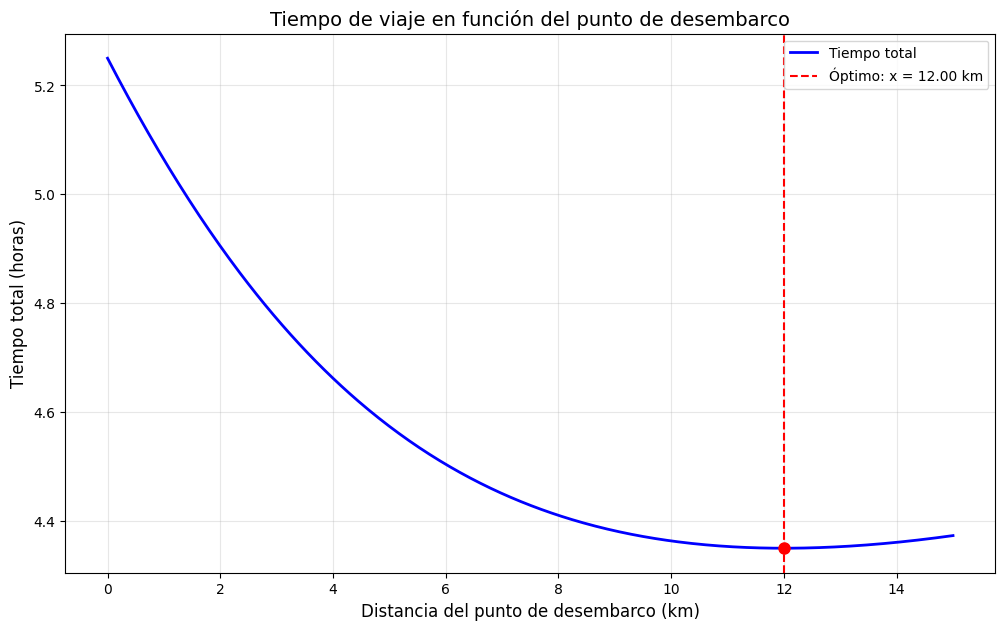

In [55]:
x_values = np.linspace(0, distancia_poblado, 500)
tiempo_values = tiempo_total(x_values)

plt.figure(figsize=(12, 7))
plt.plot(x_values, tiempo_values, 'b-', linewidth=2, label='Tiempo total')
plt.axvline(x=x_optimo, color='r', linestyle='--',
            label=f'Óptimo: x = {x_optimo:.2f} km')
plt.plot(x_optimo, tiempo_minimo, 'ro', markersize=8)

plt.xlabel('Distancia del punto de desembarco (km)', fontsize=12)
plt.ylabel('Tiempo total (horas)', fontsize=12)
plt.title('Tiempo de viaje en función del punto de desembarco', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

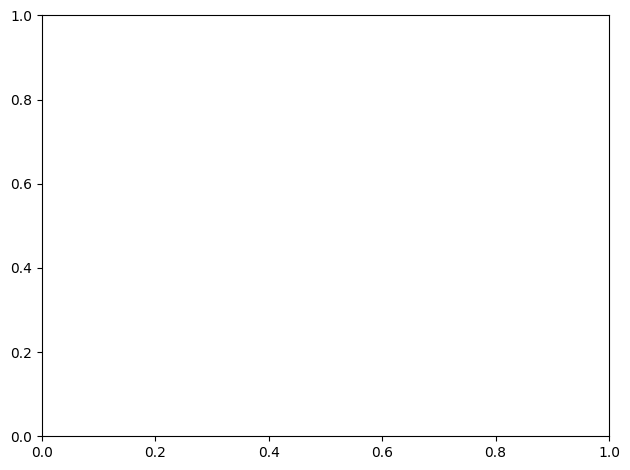

In [56]:
plt.annotate(f'Tiempo mínimo: {tiempo_minimo:.3f} h',
             xy=(x_optimo, tiempo_minimo),
             xytext=(x_optimo+2, tiempo_minimo+0.1),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=11, color='red')

plt.tight_layout()
plt.show()

In [60]:
print("\n" + "="*60)
print("COMPARACIÓN CON ESTRATEGIAS ALTERNATIVAS")
print("="*60)

t_directo = tiempo_total(distancia_poblado)
print(f"a) Ir directamente al poblado (x=15):")
print(f"   Tiempo: {t_directo:.4f} h ({t_directo-tiempo_minimo:.4f} h más que el óptimo)")

t_cercano = tiempo_total(0)
print(f"b) Ir al punto más cercano (x=0):")
print(f"   Tiempo: {t_cercano:.4f} h ({t_cercano-tiempo_minimo:.4f} h más que el óptimo)")

t_medio = tiempo_total(distancia_poblado/2)
print(f"c) Ir al punto medio (x=7.5):")
print(f"   Tiempo: {t_medio:.4f} h ({t_medio-tiempo_minimo:.4f} h más que el óptimo)")


COMPARACIÓN CON ESTRATEGIAS ALTERNATIVAS
a) Ir directamente al poblado (x=15):
   Tiempo: 4.3732 h (0.0232 h más que el óptimo)
b) Ir al punto más cercano (x=0):
   Tiempo: 5.2500 h (0.9000 h más que el óptimo)
c) Ir al punto medio (x=7.5):
   Tiempo: 4.4288 h (0.0788 h más que el óptimo)


In [61]:
print("\n" + "="*60)
print("SOLUCIÓN ANALÍTICA")
print("="*60)
print("Para encontrar el óptimo, derivamos e igualamos a cero:")
print("T(x) = √(9² + x²)/4 + |15 - x|/5")
print("Para x < 15: T(x) = √(81 + x²)/4 + (15 - x)/5")
print("dT/dx = (x/(4√(81+x²))) - 1/5 = 0")
print("=> x/(4√(81+x²)) = 1/5")
print("=> 5x = 4√(81+x²)")
print("=> 25x² = 16(81+x²)")
print("=> 25x² = 1296 + 16x²")
print("=> 9x² = 1296")
print("=> x² = 144")
print("=> x = 12 km")


SOLUCIÓN ANALÍTICA
Para encontrar el óptimo, derivamos e igualamos a cero:
T(x) = √(9² + x²)/4 + |15 - x|/5
Para x < 15: T(x) = √(81 + x²)/4 + (15 - x)/5
dT/dx = (x/(4√(81+x²))) - 1/5 = 0
=> x/(4√(81+x²)) = 1/5
=> 5x = 4√(81+x²)
=> 25x² = 16(81+x²)
=> 25x² = 1296 + 16x²
=> 9x² = 1296
=> x² = 144
=> x = 12 km


In [62]:
print(f"\nSolución analítica: x = 12 km")
print(f"Solución numérica:  x = {x_optimo:.6f} km")
print(f"Diferencia: {np.abs(12 - x_optimo):.6f} km")


Solución analítica: x = 12 km
Solución numérica:  x = 12.000000 km
Diferencia: 0.000000 km
